# Poster Visualizations - Urban Change Detection
## ChangeFormer Results Analysis


In [ ]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12


## 1. Load Training History


In [ ]:
# Load training history
history_path = 'checkpoints_v2/changeformer_lora_v2_20251130_152754/history.yaml'
with open(history_path, 'r') as f:
    history = yaml.safe_load(f)

train_iou = history['train_iou']
val_iou = history['val_iou']
train_loss = history['train_loss']
val_loss = history['val_loss']
epochs = list(range(1, len(train_iou) + 1))

print(f"Total epochs: {len(epochs)}")
print(f"Best validation IoU: {max(val_iou):.4f} at epoch {val_iou.index(max(val_iou)) + 1}")


Total epochs: 50
Best validation IoU: 0.6962 at epoch 34


## 2. Plot Training & Validation IoU (Main plot for poster)


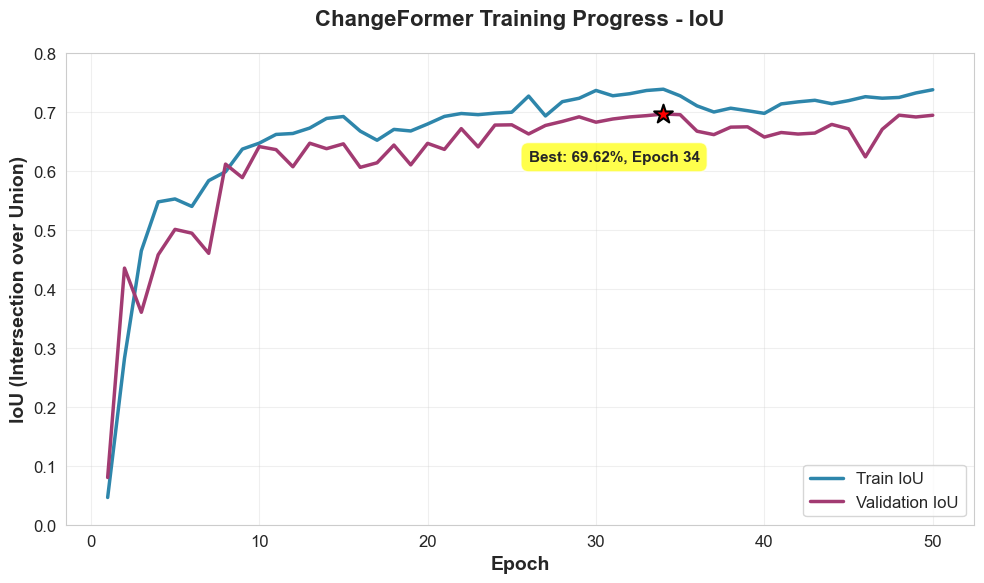

✅ Saved: poster_iou_plot.png


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(epochs, train_iou, label='Train IoU', linewidth=2.5, color='#2E86AB')
ax.plot(epochs, val_iou, label='Validation IoU', linewidth=2.5, color='#A23B72')

# Mark best validation IoU
best_epoch = val_iou.index(max(val_iou)) + 1
best_iou = max(val_iou)
ax.scatter([best_epoch], [best_iou], color='red', s=200, zorder=5, marker='*', edgecolors='black', linewidth=1.5)
ax.annotate(f'Best: {best_iou:.2%}, Epoch {best_epoch}', 
            xy=(best_epoch, best_iou), 
            xytext=(best_epoch-8, best_iou-0.08),
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=2))

ax.set_xlabel('Epoch', fontsize=14, fontweight='bold')
ax.set_ylabel('IoU (Intersection over Union)', fontsize=14, fontweight='bold')
ax.set_title('ChangeFormer Training Progress - IoU', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='lower right')
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 0.8])

plt.tight_layout()
plt.savefig('poster_iou_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: poster_iou_plot.png")


## 3. Plot Test Metrics Bar Chart


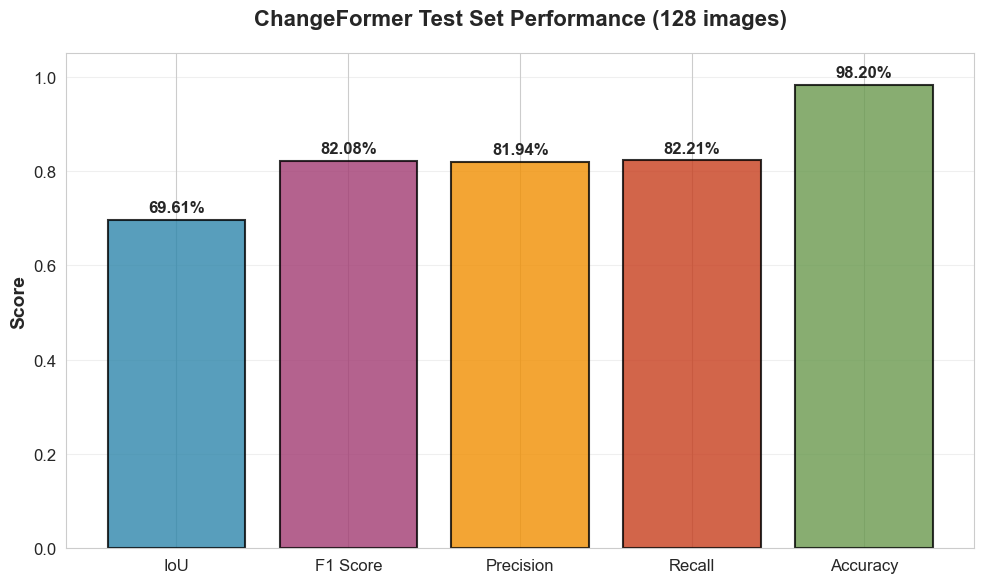

✅ Saved: poster_metrics_bar.png


In [ ]:
# Load test results
with open('results_official/results.yaml', 'r') as f:
    results = yaml.safe_load(f)

metrics = ['IoU', 'F1 Score', 'Precision', 'Recall', 'Accuracy']
values = [
    results['iou'],
    results['f1'],
    results['precision'],
    results['recall'],
    results['accuracy']
]

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']
bars = ax.bar(metrics, values, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

# Add value labels on bars
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{val:.2%}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Score', fontsize=14, fontweight='bold')
ax.set_title('ChangeFormer Test Set Performance (128 images)', fontsize=16, fontweight='bold', pad=20)
ax.set_ylim([0, 1.05])
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('poster_metrics_bar.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: poster_metrics_bar.png")


## 4. Summary for Poster


In [ ]:
print("="*60)
print("POSTER CONTENT RECOMMENDATIONS")
print("="*60)
print("\n📊 PLOTS TO INCLUDE:")
print("  1. poster_iou_plot.png - Shows training progress")
print("  2. poster_metrics_bar.png - Final performance metrics")
print("  3. results_official/visualizations/sample_1.png - Good prediction")
print("  4. results_official/visualizations/sample_2.png - Good prediction")
print("  5. results_official/visualizations/sample_4.png - Large building detection")
print("\n📝 KEY NUMBERS FOR POSTER:")
print(f"  • Dataset: LEVIR-CD (445 train, 64 val, 128 test)")
print(f"  • Model: ChangeFormer with LoRA (Pre-trained ViT backbone)")
print(f"  • Training: 50 epochs, ~25 minutes on MPS")
print(f"  • Best Val IoU: {max(val_iou):.2%} (Epoch {val_iou.index(max(val_iou)) + 1})")
print(f"  • Test IoU: {results['iou']:.2%}")
print(f"  • Test F1: {results['f1']:.2%}")
print(f"  • Test Accuracy: {results['accuracy']:.2%}")
print("\n🎯 POSTER SECTIONS SUGGESTED:")
print("  1. Introduction - Urban change detection problem")
print("  2. Dataset - LEVIR-CD satellite imagery (show sample pair)")
print("  3. Model Architecture - ChangeFormer diagram")
print("  4. Training - IoU curve over epochs")
print("  5. Results - Metrics bar chart + example predictions")
print("  6. Analysis - Strengths (large buildings) & Limitations (small details)")
print("  7. Comparison - Table comparing U-Net/Siamese/ChangeFormer (TBD)")
print("\n💡 ANALYSIS POINT:")
print("  'ChangeFormer excels at detecting large-scale building changes")
print("  but shows limitations in capturing fine-grained details due to")
print("  patch-based processing (16×16 patches in Vision Transformer).'")
print("\n✅ All files ready for poster creation!")
print("="*60)


POSTER CONTENT RECOMMENDATIONS

📊 PLOTS TO INCLUDE:
  1. poster_iou_plot.png - Shows training progress
  2. poster_metrics_bar.png - Final performance metrics
  3. results_official/visualizations/sample_1.png - Good prediction
  4. results_official/visualizations/sample_2.png - Good prediction
  5. results_official/visualizations/sample_4.png - Large building detection

📝 KEY NUMBERS FOR POSTER:
  • Dataset: LEVIR-CD (445 train, 64 val, 128 test)
  • Model: ChangeFormer with LoRA (Pre-trained ViT backbone)
  • Training: 50 epochs, ~25 minutes on MPS
  • Best Val IoU: 69.62% (Epoch 34)
  • Test IoU: 69.61%
  • Test F1: 82.08%
  • Test Accuracy: 98.20%

🎯 POSTER SECTIONS SUGGESTED:
  1. Introduction - Urban change detection problem
  2. Dataset - LEVIR-CD satellite imagery (show sample pair)
  3. Model Architecture - ChangeFormer diagram
  4. Training - IoU curve over epochs
  5. Results - Metrics bar chart + example predictions
  6. Analysis - Strengths (large buildings) & Limitations (